In [92]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as spst
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic      #mosaic plot!
from statsmodels.graphics.mosaicplot import mosaic   
plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')   

In [93]:
import seaborn as sns
print(sns.__version__)

0.11.0


In [94]:
path = 'customer_data_.csv'

df = pd.read_csv( path , encoding = 'CP949')
df.head()

,clust,AGE,등록(계/피),고용상태,성별,Willingness to pay/Stay,갱신,상품타입,교육수준,소득,...,결혼여부,월 납입액,VOC,타 상품 보유 현황,온라인방문빈도,갱신인센티브,판매채널,총지불금액,자동차,거주지사이즈
0,2,3,피보험자,무직,1,2.616381,0,기본,대학졸업,0,...,미혼,80000,0,1,자주방문,없음,자사영업,631000,일반세단,소
1,4,1,계약자,고용,0,6.352530,0,기본,고졸이하,102887400,...,미혼,80000,1,4이상,비방문,포인트,인터넷,54000,일반세단,중
2,5,2,계약자,휴직,0,4.974354,0,기본,대학졸업,22159500,...,기혼,60000,0,4이상,비방문,할인,자사영업,362000,일반세단,중
3,0,5,계약자,고용,1,13.480284,0,고급,고졸이하,51562500,...,기혼,110000,0,2,비방문,할인,자사영업,1264000,컴팩트카,대
4,3,4,계약자,고용,0,9.776436,0,기본,석사,26820200,...,기혼,120000,0,3,비방문,없음,대리점,947000,SUV,중


In [95]:
target = ['자동차','소득']

x = df.drop( target , axis = 1)
y = df[target]

In [96]:
len(x.columns)

19

In [97]:
x.columns

Index(['clust', 'AGE', '등록(계/피)', '고용상태', '성별', 'Willingness to pay/Stay',
       '갱신', '상품타입', '교육수준', '지역', '결혼여부', '월 납입액', 'VOC', '타 상품 보유 현황',
       '온라인방문빈도', '갱신인센티브', '판매채널', '총지불금액', '거주지사이즈'],
      dtype='object')

In [98]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
drop_cols = ['총지불금액','Willingness to pay/Stay']
x_int = x[drop_cols]
x_object = x.select_dtypes(include = 'object' )  

encoders = {}
label_data = {}

for col in x_object.columns:
    le = LabelEncoder()
    le.fit(x_object[col])
    labels = le.transform(x_object[col])
    x_object[col] = labels
    
    encoders[col] = le
    label_data[col] = labels
    
x_num = x.select_dtypes(include = 'int' )
x_num1 = x_num.drop(['총지불금액'],axis =1)
x_bum1 = pd.concat( [x_num1 , x_object] , axis = 1)
x_1 = pd.concat( [x_int,x_bum1] , axis = 1)

In [99]:
len(x_1.columns)

19

In [100]:
x_1.columns

Index(['총지불금액', 'Willingness to pay/Stay', 'clust', 'AGE', '성별', '갱신', '월 납입액',
       'VOC', '등록(계/피)', '고용상태', '상품타입', '교육수준', '지역', '결혼여부', '타 상품 보유 현황',
       '온라인방문빈도', '갱신인센티브', '판매채널', '거주지사이즈'],
      dtype='object')

In [101]:
from sklearn.preprocessing import StandardScaler
col_x = list(x_1)
scaler = StandardScaler()
x_2 = scaler.fit_transform(x_1)
x_2 = pd.DataFrame(x_2, columns=col_x)

In [102]:
le.fit( y['자동차'] )
labels = le.transform( y['자동차'])
y['자동차'] = labels
encoders['자동차'] = le
label_data['자동차'] = labels

In [103]:
encoders

{'등록(계/피)': LabelEncoder(),
 '고용상태': LabelEncoder(),
 '상품타입': LabelEncoder(),
 '교육수준': LabelEncoder(),
 '지역': LabelEncoder(),
 '결혼여부': LabelEncoder(),
 '타 상품 보유 현황': LabelEncoder(),
 '온라인방문빈도': LabelEncoder(),
 '갱신인센티브': LabelEncoder(),
 '판매채널': LabelEncoder(),
 '거주지사이즈': LabelEncoder(),
 '자동차': LabelEncoder()}

In [104]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split( x_2 , y , test_size= 0.3 , random_state= 1)

In [105]:
from sklearn.model_selection import cross_val_score

In [106]:
# 1 DecisionTree
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor( random_state= 1)
cv_score = cross_val_score( dt_model , x_train , y_train ,cv=5 , scoring='r2')
print(cv_score.mean())
dt_model.fit(x_train , y_train)

dt_pred = dt_model.predict( x_test )

0.6608081167113827


In [107]:
# 평가 및 result 함수에 저장
result = pd.DataFrame(columns=['data', 'model_name', 'MAE', 'R2' , 'CV score'])
result

,data,model_name,MAE,R2,CV score


In [108]:
from sklearn.metrics import r2_score , mean_absolute_error

y_pred = dt_pred
print( 'MAE:' , mean_absolute_error( y_test , y_pred ))
print( '\nR2:' , r2_score( y_test , y_pred ))

MAE: 2997096.177777778

R2: 0.709719088901598


In [109]:
y_pred = dt_pred
result.loc[0] = ['df', 'Decision tree', mean_absolute_error( y_test , y_pred ), r2_score( y_test , y_pred ), cv_score.mean() ]
result

,data,model_name,MAE,R2,CV score
0,df,Decision tree,2.997096e+06,0.709719,0.660808


In [110]:
x_train_s = x_train.copy()
x_test_s = x_test.copy()
# 2 KNN
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor( n_neighbors= 3 )
cv_score = cross_val_score( knn_model , x_train_s , y_train ,cv=5 , scoring='r2')
print(cv_score.mean())
knn_model.fit( x_train_s , y_train)
knn_pred = knn_model.predict( x_test_s)
# 평가 및 저장 
y_pred = knn_pred
print( 'MAE:' , mean_absolute_error( y_test , y_pred ))
print( '\nR2:' , r2_score( y_test , y_pred ))
result.loc[1] = ['df', 'KNN', mean_absolute_error( y_test , y_pred ), r2_score( y_test , y_pred ), cv_score.mean() ]
result

0.6174703870760017
MAE: 5192563.541481477

R2: 0.662637300297445


,data,model_name,MAE,R2,CV score
0,df,Decision tree,2.997096e+06,0.709719,0.660808
1,df,KNN,5.192564e+06,0.662637,0.617470


In [111]:
# 3 linearRegression
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
cv_score = cross_val_score( lr_model , x_train , y_train ,cv=5 , scoring='r2')
print(cv_score.mean())
lr_model.fit(x_train, y_train)
lr_pred = lr_model.predict( x_test )
# 평가 및 저장 
y_pred = lr_pred
print( 'MAE:' , mean_absolute_error( y_test , y_pred ))
print( '\nR2:' , r2_score( y_test , y_pred ))
result.loc[2] = ['df', 'Linear Reg', mean_absolute_error( y_test , y_pred ), r2_score( y_test , y_pred ), cv_score.mean() ]
result

0.44421310905631495
MAE: 11477850.5366737

R2: 0.4467331265248506


,data,model_name,MAE,R2,CV score
0,df,Decision tree,2.997096e+06,0.709719,0.660808
1,df,KNN,5.192564e+06,0.662637,0.617470
2,df,Linear Reg,1.147785e+07,0.446733,0.444213


In [113]:
# 4 RandomForest

from sklearn.ensemble import RandomForestRegressor
rfr_model = RandomForestRegressor( random_state= 1 , max_depth= 5 )
cv_score = cross_val_score( rfr_model , x_train , y_train ,cv=5 , scoring='r2')
print(cv_score.mean())
rfr_model.fit(x_train , y_train)
rfr_pred = rfr_model.predict( x_test )
# 평가 및 저장 
y_pred = rfr_pred
print( 'MAE:' , mean_absolute_error( y_test , y_pred ))
print( '\nR2:' , r2_score( y_test , y_pred ))
result.loc[4] = ['df', 'RandomForest', mean_absolute_error( y_test , y_pred ), r2_score( y_test , y_pred ), cv_score.mean() ]
result

0.6284794215309201
MAE: 3469693.1214672285

R2: 0.6278039117455573


,data,model_name,MAE,R2,CV score
0,df,Decision tree,2.997096e+06,0.709719,0.660808
1,df,KNN,5.192564e+06,0.662637,0.617470
2,df,Linear Reg,1.147785e+07,0.446733,0.444213
4,df,RandomForest,3.469693e+06,0.627804,0.628479


In [114]:
x_train1 = x_train.copy()
x_test1 = x_test.copy()
x_train1.columns = list(range(0 , x_train.shape[1]))
x_test1.columns = list(range(0 , x_train.shape[1]))

In [116]:
!pip install lightgbm

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/b3/f8/ee33e36194eb03a76eccf3adac3fba51f0e56fbd20609bb531659d48d3cb/lightgbm-4.1.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ------- -------------------------------- 0.2/1.3 MB 7.6 MB/s eta 0:00:01
   ---------------------- ----------------- 0.7/1.3 MB 7.8 MB/s eta 0:00:01
   ------------------------------------- -- 1.2/1.3 MB 8.7 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 8.4 MB/s eta 0:00:00


In [120]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/32/10/4689bda37403f7dd029d550c4446e0097c2f33b8ae877b235e76d5c49bc2/xgboost-2.0.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
   ---------------------------------------- 0.3/99.7 MB 9.6 MB/s eta 0:00:11
   ---------------------------------------- 0.8/99.7 MB 10.2 MB/s eta 0:00:10
   ---------------------------------------- 1.1/99.7 MB 10.1 MB/s eta 0:00:10
    --------------------------------------- 1.9/99.7 MB 10.7 MB/s eta 0:00:10
    --------------------------------------- 2.3/99.7 MB 10.3 MB/s eta 0:00:10
   - -------------------------------------- 2.9/99.7 MB 10.9 MB/s eta 0:00:09
   - -------------------------------------- 3.5/99.7 MB 11.1 MB/s eta 0:00:09
   - -------------------------------------- 4.0/99.7 MB 11.1 MB/s eta 0:00:09
   - -------------------------------------- 4.5/99.7 MB 11.6 MB/s eta 0:00:09
   - -------------------

In [121]:
#7 XGBoost 
from xgboost import XGBRegressor

xgb_model = XGBRegressor()
cv_score = cross_val_score( xgb_model , x_train1 , y_train , cv = 5 ,scoring='r2')
print( cv_score.mean())
xgb_model.fit( x_train1 , y_train )
xgb_pred = xgb_model.predict( x_test1 )
# 평가 및 저장 
y_pred = xgb_pred
print( 'MAE:' , mean_absolute_error( y_test , y_pred ))
print( '\nR2:' , r2_score( y_test , y_pred ))
result.loc[6] = ['df', 'XGB', mean_absolute_error( y_test , y_pred ), r2_score( y_test , y_pred ), cv_score.mean() ]
result

0.9299045902840477
MAE: 2682313.1491184835

R2: 0.9314069984846018


,data,model_name,MAE,R2,CV score
0,df,Decision tree,2.997096e+06,0.709719,0.660808
1,df,KNN,5.192564e+06,0.662637,0.617470
2,df,Linear Reg,1.147785e+07,0.446733,0.444213
4,df,RandomForest,3.469693e+06,0.627804,0.628479
6,df,XGB,2.682313e+06,0.931407,0.929905


## LIGHT GBM과 SVM은 tqrget이 2열 이상일때 에러가뜨는 것으로 보임

# 2.하이퍼 파라미터 튜닝 시작
가장 잘나온 XGB 을 가지고 하이퍼 파라미터 튜닝을 하자. 

In [123]:
# 평가 및 result 함수에 저장
result1 = pd.DataFrame(columns=['data', 'model_name', 'MAE', 'R2'])
result1

,data,model_name,MAE,R2


In [124]:
from sklearn.model_selection import GridSearchCV

In [125]:
#1 linearReg 릿지CV
from sklearn.linear_model import RidgeCV

alpha = np.linspace(0.1 , 100 , 50)
model_rg = RidgeCV( alphas = alpha , cv = 5)
model_rg.fit( x_train , y_train )

# 성능확인
print('학습성능:', model_rg.score( x_train , y_train))
print('평가성능:', model_rg.score( x_test , y_test))
print('alpha',model_rg.alpha_)

학습성능: 0.44734420256574003
평가성능: 0.44677646933831017
alpha 20.487755102040822


In [126]:
rg_pred = model_rg.predict( x_test )
y_pred = rg_pred
print( 'MAE:' , mean_absolute_error( y_test , y_pred ))
print( '\nR2:' , r2_score( y_test , y_pred ))
result1.loc[0] = ['df', 'Ridge', mean_absolute_error( y_test , y_pred ), r2_score( y_test , y_pred )]
result1

MAE: 11480693.578978604

R2: 0.44677646933831017


,data,model_name,MAE,R2
0,df,Ridge,1.148069e+07,0.446776


In [129]:
#2 LinearReg 라쏘
from sklearn.linear_model import MultiTaskLassoCV

alpha = np.linspace(0.1 , 100 , 50 )
model_ls = MultiTaskLassoCV( alphas= alpha , cv = 5 , random_state=1)
model_ls.fit( x_train , y_train)

print('학습성능:', model_ls.score( x_train , y_train))
print('평가성능:', model_ls.score( x_test , y_test))
print('alpha',model_ls.alpha_)

학습성능: 0.4473495203058379
평가성능: 0.4467341237941336
alpha 100.0


In [131]:
#3 linearReg 엘라스틱넷
from sklearn.linear_model import MultiTaskElasticNetCV
l1 = np.linspace(0.01, 1, 100)   
alpha = np.linspace(0.1 , 100, 50)
model_el = MultiTaskElasticNetCV( l1_ratio=l1, alphas = alpha , cv = 5 , random_state=1 )
model_el.fit(x_train , y_train )
print('학습성능:', model_el.score(x_train, y_train))
print('평가성능:', model_el.score(x_test, y_test))
print('-' * 28)
print('l1_ratio:', model_el.l1_ratio_)
print('alpha:', model_el.alpha_)

학습성능: 0.4473354123550282
평가성능: 0.446797936672327
----------------------------
l1_ratio: 0.9600000000000001
alpha: 0.1


In [132]:
#4 하이퍼 파라미터 튜닝 XGB
from xgboost import XGBRegressor
params = {'learning_rate':[0.01,0.05,0.1,0.3], 'max_depth':list(range(1 , 10))}
xgb_model = XGBRegressor()
xgb_hpt_model = GridSearchCV( xgb_model , param_grid= params , cv = 3 , verbose = 2 )
xgb_hpt_model.fit( x_train1 , y_train )

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END ....................learning_rate=0.01, max_depth=1; total time=   0.0s
[CV] END ....................learning_rate=0.01, max_depth=1; total time=   0.0s
[CV] END ....................learning_rate=0.01, max_depth=1; total time=   0.0s
[CV] END ....................learning_rate=0.01, max_depth=2; total time=   0.0s
[CV] END ....................learning_rate=0.01, max_depth=2; total time=   0.0s
[CV] END ....................learning_rate=0.01, max_depth=2; total time=   0.0s
[CV] END ....................learning_rate=0.01, max_depth=3; total time=   0.1s
[CV] END ....................learning_rate=0.01, max_depth=3; total time=   0.1s
[CV] END ....................learning_rate=0.01, max_depth=3; total time=   0.0s
[CV] END ....................learning_rate=0.01, max_depth=4; total time=   0.0s
[CV] END ....................learning_rate=0.01, max_depth=4; total time=   0.0s
[CV] END ....................learning_rate=0.01

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.3],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             verbose=2)

In [139]:
xgb_pred = xgb_hpt_model.predict( x_test1 )
y_pred = xgb_pred
print( xgb_hpt_model.best_params_)
print( 'MAE:' , mean_absolute_error( y_test , y_pred ))
print( '\nR2:' , r2_score( y_test , y_pred ))
result1.loc[1] = ['df', 'XGB_HPT', mean_absolute_error( y_test , y_pred ), r2_score( y_test , y_pred )]
result1

{'learning_rate': 0.3, 'max_depth': 7}
MAE: 2640711.18007097

R2: 0.9320896490381041


,data,model_name,MAE,R2
0,df,Ridge,1.148069e+07,0.446776
1,df,XGB_HPT,2.640711e+06,0.932090


In [141]:
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/80/6f/57d36f6507e432d7fc1956b2e9e8530c5c2d2bfcd8821bcbfae271cd6688/tensorflow-2.14.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.14.0 from https://files.pythonhosted.org/packages/ad/6e/1bfe367855dd87467564f7bf9fa14f3b17889988e79598bc37bf18f5ffb6/tensorflow_intel-2.14.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/57.5 kB ? eta -:--:--
     ---------------------------------------- 57.5

In [142]:
#5 DNN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint
from tensorflow.keras.backend import clear_session

In [143]:
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

In [144]:
n_features = x_train.shape[1]
n_features

19

In [145]:
es = EarlyStopping( monitor='val_loss' , min_delta=0.001 , patience= 5 , mode = 'min')
n_features = x_train.shape[1]

clear_session()

dnn_model = Sequential([Dense(x_train.shape[1]*2,input_shape = (n_features , ),activation = 'relu'),
                        # Dense(4096,activation = 'relu'),
                        # Dense(1024,activation = 'relu'),
                        Dense(64,activation = 'relu'),
                        Dense(16,activation = 'relu'),
                        Dense(8,activation = 'relu'),
                        Dense(1,activation = 'relu')
                       ])
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 38)                760       
                                                                 
 dense_1 (Dense)             (None, 64)                2496      
                                                                 
 dense_2 (Dense)             (None, 16)                1040      
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 4441 (17.35 KB)
Trainable params: 4441 (17.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [146]:
from tensorflow.keras.optimizers import Adam

dnn_model.compile(optimizer = Adam( learning_rate = 0.001 ) , loss = 'mse')

In [147]:
history = dnn_model.fit( x_train , y_train , validation_split=0.2 , callbacks=es,  epochs=200).history

Epoch 1/200
210/210 [==============================] - 2s 4ms/step - loss: 1788326000459776.0000 - val_loss: 1805756051488768.0000
Epoch 2/200
210/210 [==============================] - 0s 2ms/step - loss: 1785448238153728.0000 - val_loss: 1795434708205568.0000
Epoch 3/200
210/210 [==============================] - 1s 2ms/step - loss: 1746138281541632.0000 - val_loss: 1706266623737856.0000
Epoch 4/200
210/210 [==============================] - 0s 2ms/step - loss: 1579956333182976.0000 - val_loss: 1451070135992320.0000
Epoch 5/200
210/210 [==============================] - 0s 2ms/step - loss: 1315835708702720.0000 - val_loss: 1221412463312896.0000
Epoch 6/200
210/210 [==============================] - 0s 2ms/step - loss: 1183697684398080.0000 - val_loss: 1159369915891712.0000
Epoch 7/200
210/210 [==============================] - 0s 2ms/step - loss: 1140816999350272.0000 - val_loss: 1126264844845056.0000
Epoch 8/200
210/210 [==============================] - 0s 2ms/step - loss: 11093365

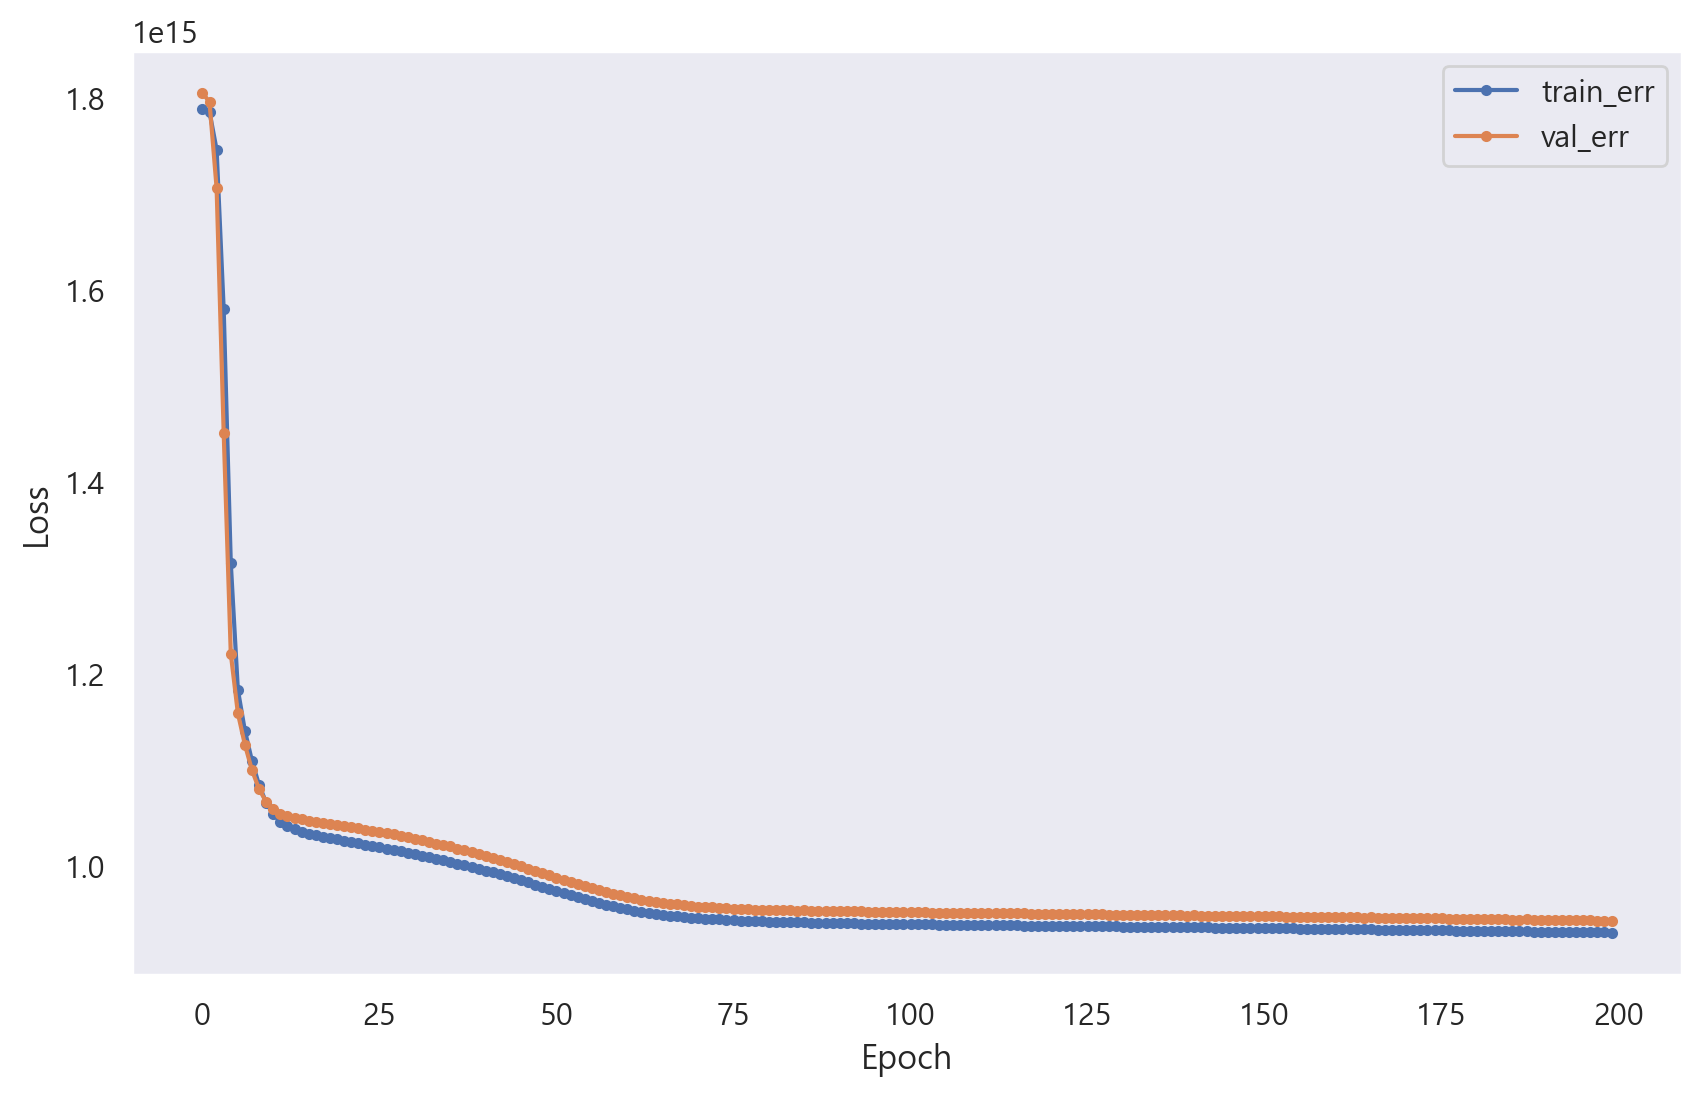

In [148]:
dl_history_plot(history)

In [153]:
y_pred

array([[42543720.],
       [28121600.],
       [25301870.],
       ...,
       [12123846.],
       [10220177.],
       [28741934.]], dtype=float32)

In [154]:
result1.to_csv( '튜닝 및 딥러닝결과2.csv' , index_label= True )

In [155]:
import joblib

# 모델을 학습한 후에 저장할 때
model = xgb_hpt_model  # 모델 학습 함수 호출
joblib.dump(model, 'model_xgb_tun2.pkl')

['model_xgb_tun2.pkl']

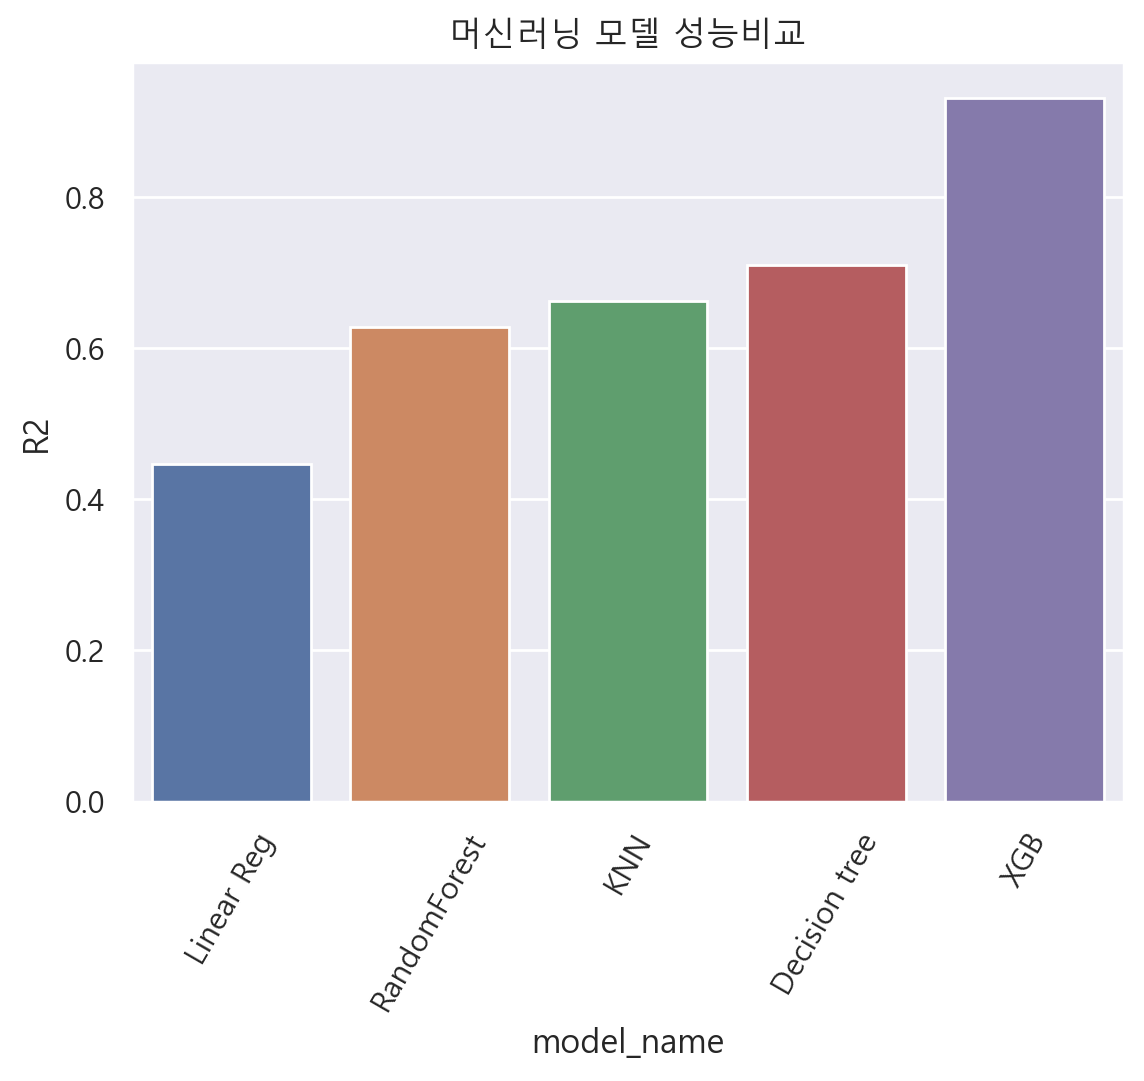

In [156]:
res = result.copy()
res.sort_values( by = 'R2' , inplace= True )
plt.title( '머신러닝 모델 성능비교' )
sns.barplot( x = 'model_name' , y = 'R2' , data = res)
plt.xticks( rotation = 60 )

plt.show()

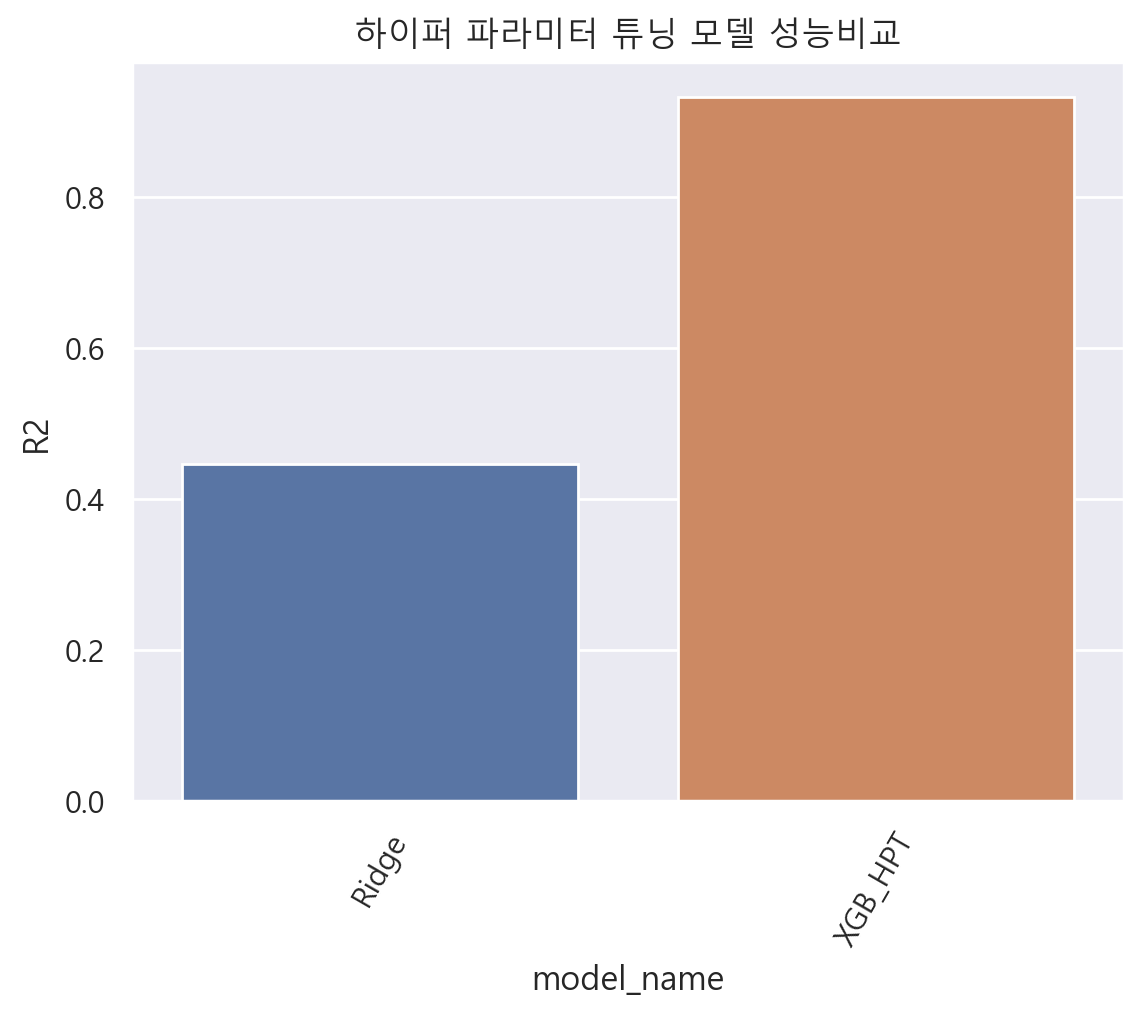

In [157]:
plt.title( '하이퍼 파라미터 튜닝 모델 성능비교' )
res1 = result1.copy()
res1.sort_values( by = 'R2' , inplace= True )
sns.barplot( x = 'model_name' , y = 'R2' , data = res1)
plt.xticks( rotation = 60 )
plt.show()